In [27]:
!pip install datasets

0    Suspect: Yes ma'am, are you there? Suspect: Yes ma'am, this is Kevin, the computer guy. You remember me? Suspect: Yes ma'am. So first of all, I want you to join this call. This is in regards to your computer. As I already told you, the IP address of your computer has been compromised with some form. Suspect: And ma'am, due to that, whatever data you have in your computer is totally hacked by the hackers, and they are downloading lots of unwanted errors and warning reports and viruses in your computer. Suspect: Yes ma'am, yes. So ma'am, first of all, I want you to go ahead and be in front of your computer for a moment so that I can go ahead and show you the problem. Suspect: No ma'am, no problem. Ma'am, I want you to go ahead and be in front of your computer for a moment again. Suspect: Okay. Suspect: Yes. Suspect: Ma'am, he's one of our...he's one of my colleagues. Suspect: Yes, yes, this is me, this is me. No ma'am, my name is Kevin. All right, granny. So now look at the extreme 

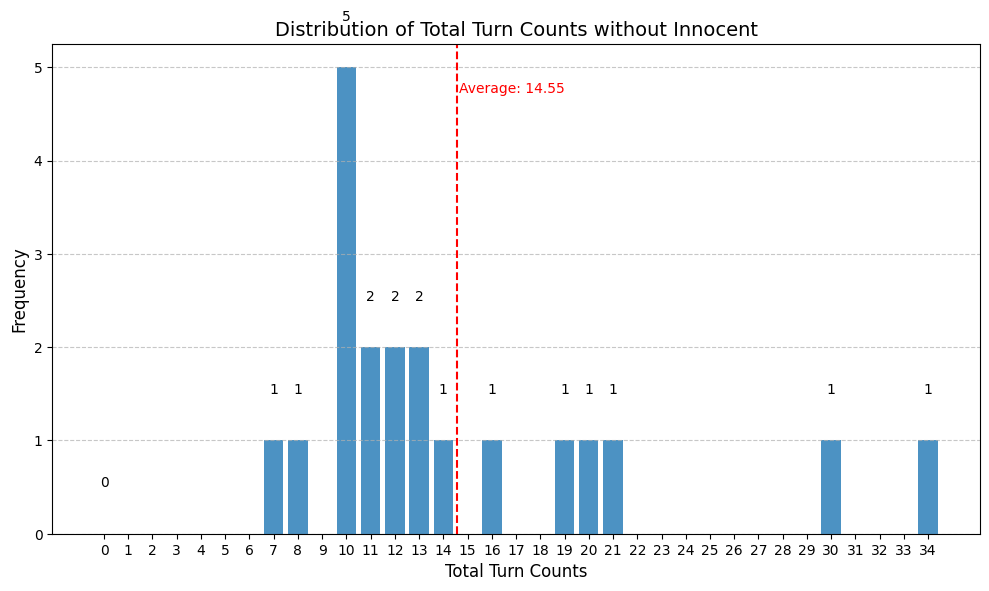

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset, Dataset

dataset = load_dataset("BothBosu/youtube-scam-conversations")
dataset = dataset.remove_columns("type")

test_dataset = dataset["train"]
test_df = test_dataset.to_pandas()

# Count the occurrences of "Suspect:"
test_df['Suspect_turns'] = test_df['dialogue'].str.count('Suspect:')

# Compute the total turns of "Suspect:"
test_df['total_turns'] = test_df['Suspect_turns']

# Function to filter only the Suspect's dialogue and remove the 'Suspect:' string
def filter_suspect_dialogue(dialogue):
    lines = dialogue.split('\n')
    suspect_dialogue = []

    for line in lines:
        if line.startswith('Suspect:'):
            # Append the entire line (including 'Suspect:') to the list
            suspect_dialogue.append(line.strip())

    return ' '.join(suspect_dialogue).strip()

# Apply the function to the DataFrame
test_df['dialogue'] = test_df['dialogue'].apply(filter_suspect_dialogue)
print(test_df['dialogue'].head(2))
# Create a histogram of the total turns distribution
plt.figure(figsize=(10, 6))

# Calculate the frequency of each total turn count
turn_counts_frequency = test_df['total_turns'].value_counts().sort_index()

# Create a DataFrame with 'Total Turn Counts' and 'Frequency' columns
mode_turns = pd.DataFrame({'Total Turn Counts': turn_counts_frequency.index, 'Frequency': turn_counts_frequency.values})

# Add a bar for 0 count if it doesn't exist in the data
if 0 not in mode_turns['Total Turn Counts'].values:
    mode_turns = pd.concat([pd.DataFrame({'Total Turn Counts': [0], 'Frequency': [0]}), mode_turns], ignore_index=True)

plt.bar(mode_turns['Total Turn Counts'], mode_turns['Frequency'], align='center', alpha=0.8)
plt.xlabel('Total Turn Counts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Total Turn Counts without Innocent', fontsize=14)
plt.xticks(np.arange(0, mode_turns['Total Turn Counts'].max() + 1))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add labels to the top of each bar
for i, v in enumerate(mode_turns['Frequency']):
    plt.text(mode_turns['Total Turn Counts'][i], v + 0.5, str(v), fontsize=10, ha='center')

# Calculate the average turn count
average_turns = test_df['total_turns'].mean()

# Add average, maximum, and minimum turn information to the plot
plt.axvline(average_turns, color='red', linestyle='--', label=f'Average: {average_turns:.2f}')
plt.text(average_turns + 0.1, plt.ylim()[1] * 0.9, f'Average: {average_turns:.2f}', color='red')

plt.tight_layout()
plt.show()

In [29]:
pd.set_option('display.max_colwidth', None)

test_df['dialogue'].head(2)

0    Suspect: Yes ma'am, are you there? Suspect: Yes ma'am, this is Kevin, the computer guy. You remember me? Suspect: Yes ma'am. So first of all, I want you to join this call. This is in regards to your computer. As I already told you, the IP address of your computer has been compromised with some form. Suspect: And ma'am, due to that, whatever data you have in your computer is totally hacked by the hackers, and they are downloading lots of unwanted errors and warning reports and viruses in your computer. Suspect: Yes ma'am, yes. So ma'am, first of all, I want you to go ahead and be in front of your computer for a moment so that I can go ahead and show you the problem. Suspect: No ma'am, no problem. Ma'am, I want you to go ahead and be in front of your computer for a moment again. Suspect: Okay. Suspect: Yes. Suspect: Ma'am, he's one of our...he's one of my colleagues. Suspect: Yes, yes, this is me, this is me. No ma'am, my name is Kevin. All right, granny. So now look at the extreme right-hand side bottom corner of your computer screen. Can you see you are successfully connected to the Microsoft IT department? Suspect: No, Not yet? Suspect: Because I've been waiting for you for a long time. Suspect: Yes, yes. Suspect: Oh, that's good. All right, ma'am. So now, first of all, what I'm going to do, I'm going to show you the problem that is affecting your computer, all right? All right. ma'am. So now, just give me a moment. Actually, your computer is working a little bit slower, that is why. Suspect: But you don't have to worry about it, ma'am. After today, your computer will run like a brand new machine, all right? Suspect: Ma'am, let me tell you something, ma'am. Those red color errors, each one contains somewhere around 700 to 800 viruses on it. And they have the ability to keep on multiplying by themselves whether your computer is on or off, all right? Suspect: So first of all, what I'm going to do, I'm going to close this page because this page is no longer safe for your computer. So now, I am going to show you the active connections on your computer, all right? Suspect: So ma'am, these are the local IP addresses through which you use your internet, ma'am. And if you just look over here, can you see these foreign addresses? Suspect: Ma'am, I am going to show you the problem, ma'am, because we are technicians, ma'am. So now these are the foreign IP addresses that are currently connected to your computer, ma'am. And if you look at the state, can you see all of them are established on your computer? Can you see? Suspect: So now over here, what I'm going to show you is how we got to know about your problem, all right? Suspect: So now at the bottom, can you see this transmit fail, general failure? Can you see that right? Suspect: And ma'am, if you just look over here, can you see packet sent four, received zero, lost 400%? Can you see that? Suspect: That means, ma'am, we are trying to send you regular security updates on your computer but your computer didn't receive any security updates from our end. That is the main thing. Suspect: No ma'am, it's not your fault, not your computer's fault. Actually, there are some issues on the server. This is the reason your computer got hacked. That is why. Actually, that is the reason your computer didn't receive on-time security updates on your computer. That is the reason, ma'am. And now let me go ahead and show you like how many people are currently connected to your computer, all right? Suspect: You don't have to worry about anything, granny. Today I'm calling you just to solve all your problems. You don't have to worry about anything, granny, all right? Suspect: We were senior certified technicians on Microsoft. So ma'am, first of all, tell me, apart from this computer, how many devices do you have? Do you have any other computer or any laptop or anything? Suspect: All right, ma'am. But if you just look over here, can you see current connection? Suspect: Yes, and that means, can you see

In [30]:
from transformers import AutoTokenizer, DataCollatorWithPadding

def truncate_dialogue(dialogue, max_turn):
    turns = dialogue.split()
    turn_count = 0
    truncated_dialogue = ""

    for turn in turns:
        if turn.startswith('Suspect:') or turn.startswith('Innocent:'):
            turn_count += 1

            if turn_count > max_turn:
                break

        truncated_dialogue += turn + ' '

    return truncated_dialogue.strip()

# Define the function to count occurrences and total turns
def count_turns(df):
    df['Suspect_turns'] = df['dialogue'].str.count('Suspect:')
    df['Innocent_turns'] = df['dialogue'].str.count('Innocent:')
    df['total_turns'] = df['Suspect_turns'] + df['Innocent_turns']
    return df

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dialogue column
def tokenize(batch):
    return tokenizer(batch["dialogue"], padding=True, truncation=True)

# Create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer) # The collator rename the column label to labels

In [31]:
# Truncate the dialogues to a specific number of turns and count the turns
def truncate_and_count_turns(test_df, turns):
    truncated_df = test_df.copy()
    truncated_df['dialogue'] = truncated_df['dialogue'].apply(lambda x: truncate_dialogue(x, turns))
    truncated_df = count_turns(truncated_df)
    return truncated_df

# Filter only the suspect's dialogue and remove the 'Suspect:' string
def filter_suspect_identifier(dialogue):
    suspect_dialogue = []
    lines = dialogue.splitlines()

    for line in lines:
        if line.startswith('Suspect:'):
            suspect_dialogue.append(line.replace('Suspect:', '').strip())

    return ' '.join(suspect_dialogue)

# Apply the truncation, filtering, and tokenization for 1 to 15 turns
test_dfs = []
for i in range(1, 16):
    temp_df = truncate_and_count_turns(test_df, i)
    temp_df['dialogue'] = temp_df['dialogue'].apply(filter_suspect_identifier)
    temp_dataset = Dataset.from_pandas(temp_df)
    temp_dataset = temp_dataset.map(tokenize, batched=True)
    test_dfs.append(temp_dataset)


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

In [32]:
pd.set_option('display.max_colwidth', None)
test_dfs[1].to_pandas()['dialogue'].head()

,dialogue
0,"Yes ma'am, are you there? Yes ma'am, this is Kevin, the computer guy. You remember me?"
1,"Your Geek Squad subscription is upgraded to the premium version. That is why you have been charged for it, ma'am. Yes, ma'am, we have options. Also, you can activate a $20 plan."
2,"Cancellation department, how may I help you? Oh yeah, this call is about your computer service that just expired, that's why your account has been charged $400. So do you want to cancel it or do you want to renew it? Okay, not a problem. So if you want to cancel the service and stop the statement, what you need to do is follow the corporate process so I can help you cancel the service and we can refund the money. First of all, in order to cancel, you need to fill out the cancellation form on your computer. So, is your computer on right now? Are you in front of your computer?"
3,"Thank you for calling support. How can I help you? Okay, can you please read it for me?"
4,"Thank you for calling PayPal, how may I help you? Okay, you have a charge that was being made under your PayPal account buying some Bitcoins. You're telling me that's what it seems to be, yes, $629.99. So, you are telling me that you did not make that purchase?"


In [33]:
test_dfs[13].to_pandas()['dialogue'].head()

,dialogue
0,"Yes ma'am, are you there? Yes ma'am, this is Kevin, the computer guy. You remember me? Yes ma'am. So first of all, I want you to join this call. This is in regards to your computer. As I already told you, the IP address of your computer has been compromised with some form. And ma'am, due to that, whatever data you have in your computer is totally hacked by the hackers, and they are downloading lots of unwanted errors and warning reports and viruses in your computer. Yes ma'am, yes. So ma'am, first of all, I want you to go ahead and be in front of your computer for a moment so that I can go ahead and show you the problem. No ma'am, no problem. Ma'am, I want you to go ahead and be in front of your computer for a moment again. Okay. Yes. Ma'am, he's one of our...he's one of my colleagues. Yes, yes, this is me, this is me. No ma'am, my name is Kevin. All right, granny. So now look at the extreme right-hand side bottom corner of your computer screen. Can you see you are successfully connected to the Microsoft IT department? No, Not yet? Because I've been waiting for you for a long time. Yes, yes. Oh, that's good. All right, ma'am. So now, first of all, what I'm going to do, I'm going to show you the problem that is affecting your computer, all right? All right. ma'am. So now, just give me a moment. Actually, your computer is working a little bit slower, that is why."
1,"Your Geek Squad subscription is upgraded to the premium version. That is why you have been charged for it, ma'am. Yes, ma'am, we have options. Also, you can activate a $20 plan. Can you cancel it? I can understand, ma'am. Just go to the United States website and you will get to see a cancellation option on the top of the Home Server. You have to age, ma'am. Only number seven will be agreed, number six will be blank. Scroll down a little bit and you will get to see a continue option. You have to fill out the cancellation form. Yes, ma'am. You have to write in the feedback that you want to cancel. You have to type in the feedback."
2,"Cancellation department, how may I help you? Oh yeah, this call is about your computer service that just expired, that's why your account has been charged $400. So do you want to cancel it or do you want to renew it? Okay, not a problem. So if you want to cancel the service and stop the statement, what you need to do is follow the corporate process so I can help you cancel the service and we can refund the money. First of all, in order to cancel, you need to fill out the cancellation form on your computer. So, is your computer on right now? Are you in front of your computer? Okay, and can you please confirm what do you see on your computer right now? What do you see? Do one thing, sir, can you look at your typing keyboard? On the keyboard, the left-hand side, bottom corner, do you see the Ctrl key? And next to the Ctrl key, which key do you see over there? You can see the Ctrl key, correct? On the keyboard, the left-hand side. And next, right to the Ctrl key, can you please confirm which key do you see over there? You need to press the Windows key and the letter R, R like Romeo. Press the Windows key and the letter R at the same time. And after that, what do you see? Okay, let's get back on track. You have the Run box open, correct? And you can type in the Run box. Type www.techsupport.us. Yes, that's correct. T-E-C-H-S-U-P-P-O-R-T dot U-S. Then hit Enter."
3,"Thank you for calling support. How can I help you? Okay, can you please read it for me? What exactly were you doing when you got this pop-up? Okay, can you please help me out with your complete name? Okay, perfect. And what will be the best callback number to reach you if we get disconnected? Correct, 346-595-1584? Okay, Benjamin, I'm just guiding you through a few steps that you need to do so that I can connect you with our Microsoft secured server. Then I'll go ahead and see what exactly the problem you're facing, okay? Do you have a laptop or a desktop? Okay, perfec

In [34]:
from datasets import load_metric
import numpy as np

def evaluate_model(model, dataset, device):
    # Define the metric you want to use for evaluation
    metric = load_metric("accuracy", trust_remote_code=True)

    # Define a function to generate predictions
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Use the map() function to generate predictions
    def generate_predictions(examples):
        input_ids = torch.tensor(examples['input_ids']).to(device)
        attention_mask = torch.tensor(examples['attention_mask']).to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits.cpu().numpy()
        return {'predictions': logits}

    dataset = dataset.map(generate_predictions, batched=True, batch_size=32)

    # Compute the accuracy
    accuracy = compute_metrics((dataset['predictions'], dataset['labels']))
    print(f"Accuracy: {accuracy['accuracy']:.4f}")

    return accuracy

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.1000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.2500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.4000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.3500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.4000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.5000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.5500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.6000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9000


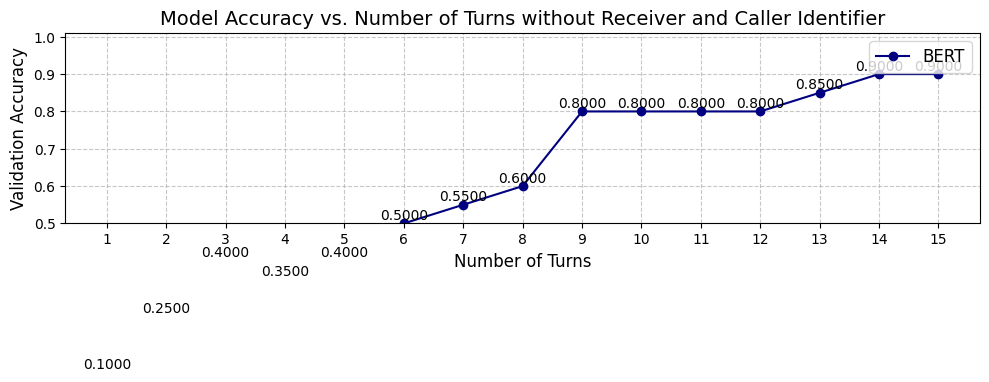

In [35]:
from transformers import BertForSequenceClassification
import torch

model = BertForSequenceClassification.from_pretrained("BothBosu/bert-suspect-dialogue-scam-classifier-v1.0")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies
BERT_accuracies = []

for df in test_dfs:
    accuracy = evaluate_model(model, df, device)
    BERT_accuracies.append(accuracy['accuracy'])

# Plot the model accuracy graph
turns = range(1, 1 + len(BERT_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BERT_accuracies, marker='o', linestyle='-', color='navy', label='BERT')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BERT_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [36]:
from torch.utils.data import DataLoader

# Define a function to handle the process for different numbers of turns
def create_data_loader(test_df, num_turns, tokenize, data_collator):
    df_copy = test_df.copy()
    df_copy['dialogue'] = df_copy['dialogue'].apply(lambda x: truncate_dialogue(x, num_turns))
    df_copy = count_turns(df_copy)
    df_copy['dialogue'] = df_copy['dialogue'].apply(filter_suspect_identifier)

    dataset = Dataset.from_pandas(df_copy)
    dataset = dataset.map(tokenize, batched=True)
    dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

    return DataLoader(dataset, batch_size=16, shuffle=False, collate_fn=data_collator)

# Create a list of DataLoaders for 1 to 15 turns
val_loaders = [
    create_data_loader(test_df, num_turns, tokenize, data_collator)
    for num_turns in range(1, 16)
]

def evaluate_model(model, val_loader, device):
    true_labels = []
    predicted_labels = []

    model.eval()
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids)
            _, predicted = torch.max(outputs.data, 1)

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(true_labels, predicted_labels)
    return accuracy


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Validation Accuracy (2 turns): 0.1000
Validation Accuracy (3 turns): 0.1000
Validation Accuracy (4 turns): 0.0500
Validation Accuracy (5 turns): 0.0500
Validation Accuracy (6 turns): 0.0500
Validation Accuracy (7 turns): 0.0500
Validation Accuracy (8 turns): 0.0500
Validation Accuracy (9 turns): 0.0500
Validation Accuracy (10 turns): 0.0500
Validation Accuracy (11 turns): 0.0500
Validation Accuracy (12 turns): 0.0500
Validation Accuracy (13 turns): 0.0500
Validation Accuracy (14 turns): 0.0500
Validation Accuracy (15 turns): 0.0500
Validation Accuracy (16 turns): 0.0500


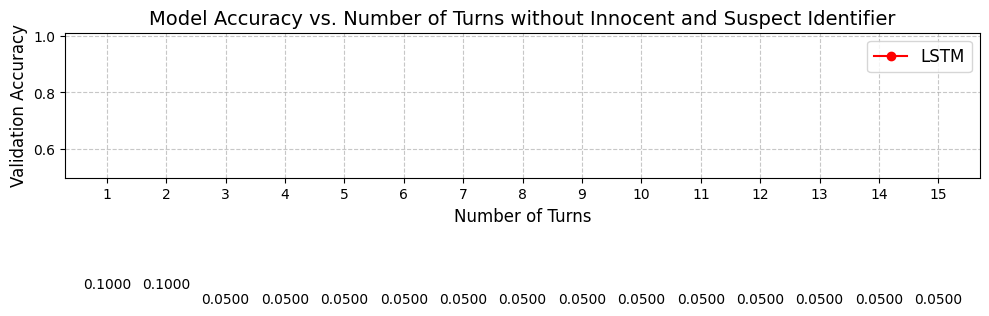

In [37]:
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the LSTM model class
class LSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout, model_type="lstm"):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = LSTMClassifier.from_pretrained("BothBosu/lstm-suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the LSTM model
LSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    LSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(LSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, LSTM_accuracies, marker='o', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(LSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Validation Accuracy (2 turns): 0.0500
Validation Accuracy (3 turns): 0.1000
Validation Accuracy (4 turns): 0.1000
Validation Accuracy (5 turns): 0.2500
Validation Accuracy (6 turns): 0.2000
Validation Accuracy (7 turns): 0.1500
Validation Accuracy (8 turns): 0.1000
Validation Accuracy (9 turns): 0.2000
Validation Accuracy (10 turns): 0.2500
Validation Accuracy (11 turns): 0.3000
Validation Accuracy (12 turns): 0.2500
Validation Accuracy (13 turns): 0.3000
Validation Accuracy (14 turns): 0.3000
Validation Accuracy (15 turns): 0.3000
Validation Accuracy (16 turns): 0.3000


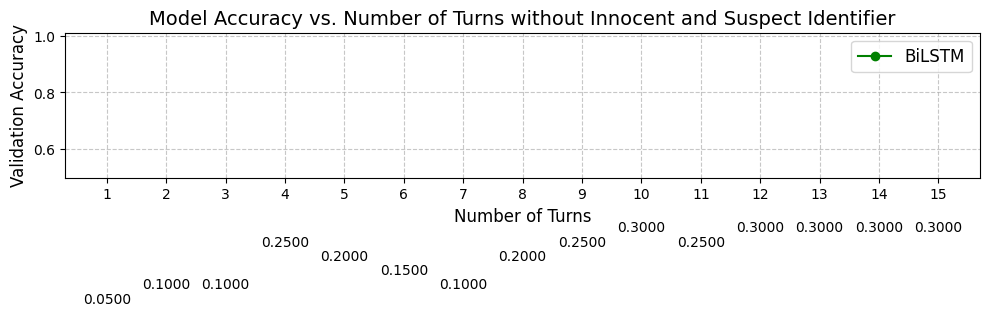

In [38]:
from huggingface_hub import PyTorchModelHubMixin

# Define the LSTM model class
class BiLSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiLSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiLSTM
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiLSTMClassifier.from_pretrained("BothBosu/bilstm-suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiLSTM model
BiLSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiLSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(BiLSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiLSTM_accuracies, marker='o', linestyle='-', color='green', label='BiLSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiLSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Validation Accuracy (2 turns): 0.6000
Validation Accuracy (3 turns): 0.6500
Validation Accuracy (4 turns): 0.6500
Validation Accuracy (5 turns): 0.8500
Validation Accuracy (6 turns): 0.7000
Validation Accuracy (7 turns): 0.6500
Validation Accuracy (8 turns): 0.7000
Validation Accuracy (9 turns): 0.8500
Validation Accuracy (10 turns): 0.8000
Validation Accuracy (11 turns): 0.7000
Validation Accuracy (12 turns): 0.6500
Validation Accuracy (13 turns): 0.6000
Validation Accuracy (14 turns): 0.6500
Validation Accuracy (15 turns): 0.6500
Validation Accuracy (16 turns): 0.7000


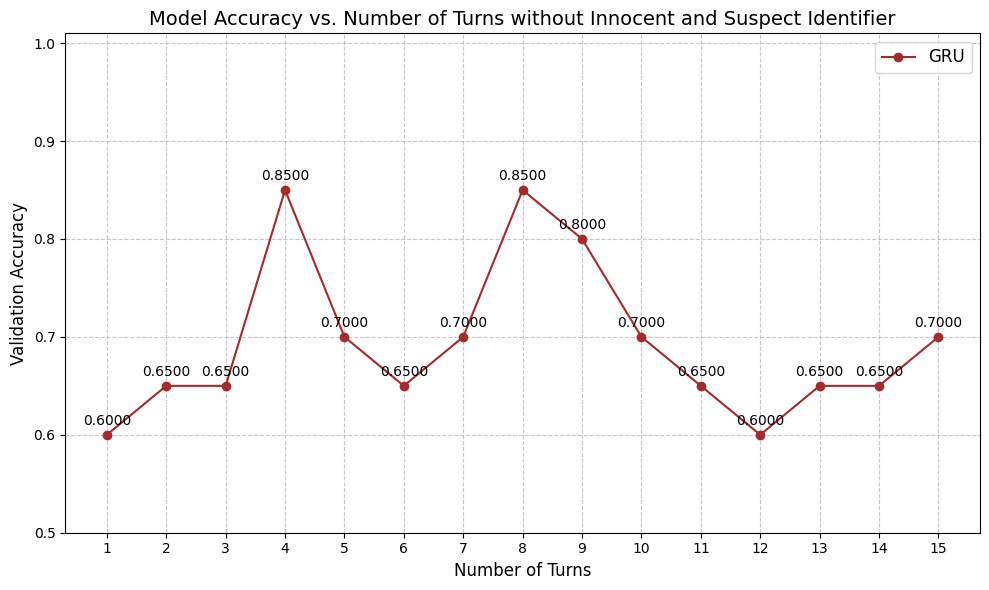

In [39]:
from huggingface_hub import PyTorchModelHubMixin

# Define the GRU model class
class GRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(GRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = GRUClassifier.from_pretrained("BothBosu/gru-suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the GRU model
GRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    GRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(GRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, GRU_accuracies, marker='o', linestyle='-', color='brown', label='GRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(GRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Validation Accuracy (2 turns): 0.3500
Validation Accuracy (3 turns): 0.2000
Validation Accuracy (4 turns): 0.2000
Validation Accuracy (5 turns): 0.2000
Validation Accuracy (6 turns): 0.2000
Validation Accuracy (7 turns): 0.2000
Validation Accuracy (8 turns): 0.2000
Validation Accuracy (9 turns): 0.2000
Validation Accuracy (10 turns): 0.2000
Validation Accuracy (11 turns): 0.2000
Validation Accuracy (12 turns): 0.2000
Validation Accuracy (13 turns): 0.2000
Validation Accuracy (14 turns): 0.2000
Validation Accuracy (15 turns): 0.2000
Validation Accuracy (16 turns): 0.2000


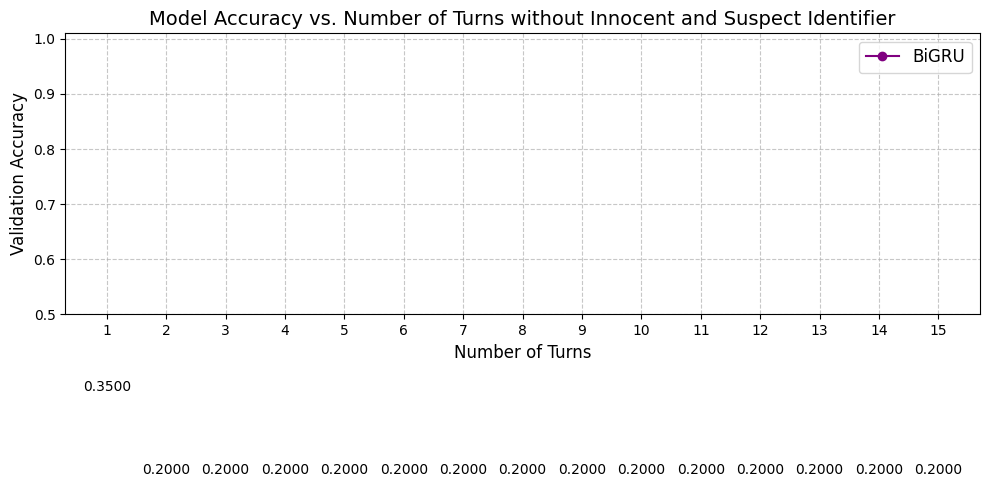

In [40]:
from huggingface_hub import PyTorchModelHubMixin

# Define the BiGRU model class
class BiGRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiGRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiGRU
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiGRUClassifier.from_pretrained("BothBosu/bigru-suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiGRU model
BiGRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiGRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(BiGRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiGRU_accuracies, marker='o', linestyle='-', color='purple', label='BiGRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiGRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Validation Accuracy (2 turns): 0.0500
Validation Accuracy (3 turns): 0.2000
Validation Accuracy (4 turns): 0.2000
Validation Accuracy (5 turns): 0.3000
Validation Accuracy (6 turns): 0.3500
Validation Accuracy (7 turns): 0.3500
Validation Accuracy (8 turns): 0.3500
Validation Accuracy (9 turns): 0.4000
Validation Accuracy (10 turns): 0.4000
Validation Accuracy (11 turns): 0.3500
Validation Accuracy (12 turns): 0.3500
Validation Accuracy (13 turns): 0.3500
Validation Accuracy (14 turns): 0.3500
Validation Accuracy (15 turns): 0.3500
Validation Accuracy (16 turns): 0.3500


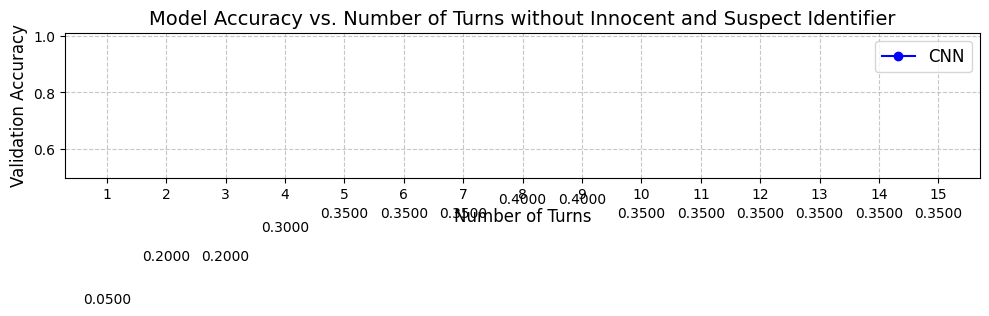

In [41]:
from huggingface_hub import PyTorchModelHubMixin
import torch.nn.functional as F

# Define the CNN model class
class CNNClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim, out_channels=num_filters, kernel_size=fs) for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.permute(0, 2, 1)
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        output = self.fc(cat)
        return output


model = CNNClassifier.from_pretrained("BothBosu/cnn-suspect-dialogue-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create a list to store the accuracies
CNN_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    CNN_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Innocent and Suspect Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.5, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(CNN_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

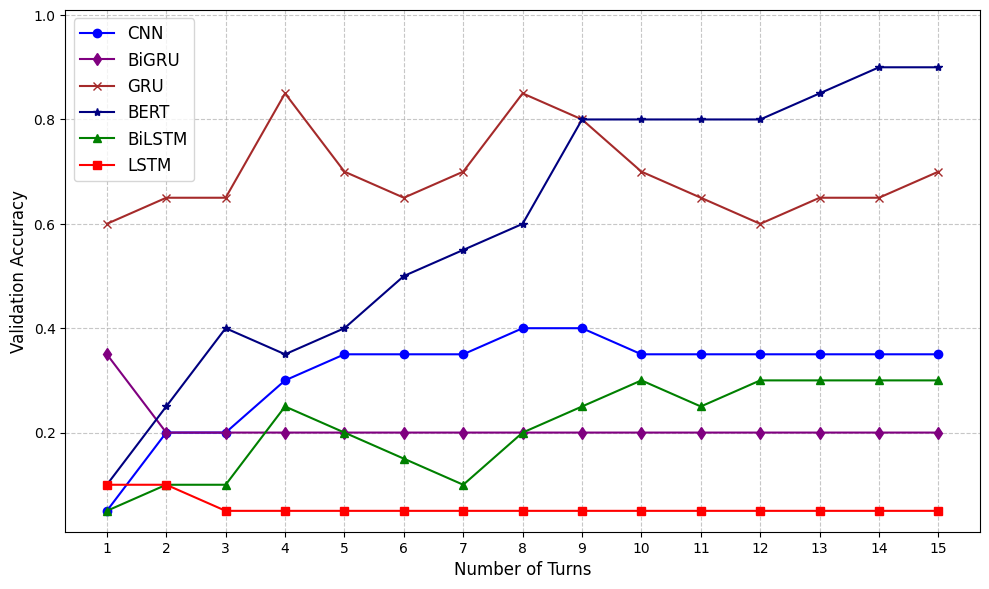

In [42]:
import matplotlib.pyplot as plt

# Plot the model accuracy graph
turns = range(1, 1 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))

plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')
plt.plot(turns, BiGRU_accuracies, marker='d', linestyle='-', color='purple', label='BiGRU')
plt.plot(turns, GRU_accuracies, marker='x', linestyle='-', color='brown', label='GRU')
plt.plot(turns, BERT_accuracies, marker='*', linestyle='-', color='navy', label='BERT')
plt.plot(turns, BiLSTM_accuracies, marker='^', linestyle='-', color='green', label='BiLSTM')
plt.plot(turns, LSTM_accuracies, marker='s', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
# plt.title('Model Accuracy vs. Number of Turns with only Suspect on Youtube Videos (Trained on Single-Agent Datset)', fontsize=14)

plt.xticks(turns)
plt.ylim(0.01, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
from datasets import load_metric
import numpy as np

def evaluate_model(model, dataset, device):
    # Define the metric you want to use for evaluation
    metric = load_metric("accuracy", trust_remote_code=True)

    # Define a function to generate predictions
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        predictions = np.argmax(logits, axis=-1)
        return metric.compute(predictions=predictions, references=labels)

    # Use the map() function to generate predictions
    def generate_predictions(examples):
        input_ids = torch.tensor(examples['input_ids']).to(device)
        attention_mask = torch.tensor(examples['attention_mask']).to(device)
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits.cpu().numpy()
        return {'predictions': logits}

    dataset = dataset.map(generate_predictions, batched=True, batch_size=32)

    # Compute the accuracy
    accuracy = compute_metrics((dataset['predictions'], dataset['labels']))
    print(f"Accuracy: {accuracy['accuracy']:.4f}")

    return accuracy

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.8500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 0.9500


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Accuracy: 1.0000


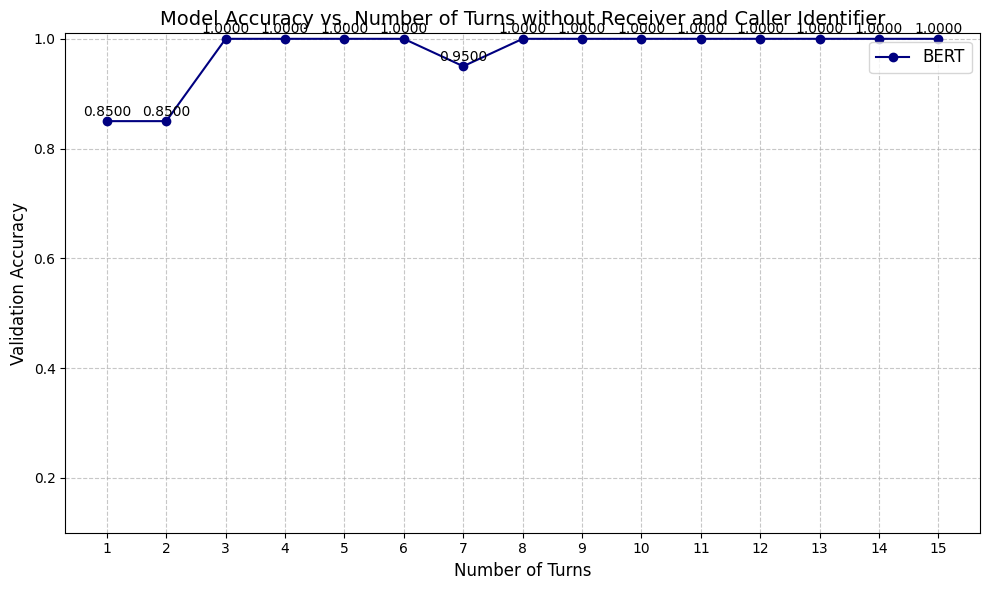

In [18]:
from transformers import BertForSequenceClassification
import torch

model = BertForSequenceClassification.from_pretrained("BothBosu/bert-agent-suspect-only-scam-classifier-v1.0")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies
BERT_accuracies = []

for df in test_dfs:
    accuracy = evaluate_model(model, df, device)
    BERT_accuracies.append(accuracy['accuracy'])

# Plot the model accuracy graph
turns = range(1, 1 + len(BERT_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BERT_accuracies, marker='o', linestyle='-', color='navy', label='BERT')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BERT_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
from torch.utils.data import DataLoader

# Define a function to handle the process for different numbers of turns
def create_data_loader(test_df, num_turns, tokenize, data_collator):
    df_copy = test_df.copy()
    df_copy['dialogue'] = df_copy['dialogue'].apply(lambda x: truncate_dialogue(x, num_turns))
    df_copy = count_turns(df_copy)
    df_copy['dialogue'] = df_copy['dialogue'].apply(filter_suspect_identifier)

    dataset = Dataset.from_pandas(df_copy)
    dataset = dataset.map(tokenize, batched=True)
    dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

    return DataLoader(dataset, batch_size=16, shuffle=False, collate_fn=data_collator)

# Create a list of DataLoaders for 1 to 15 turns
val_loaders = [
    create_data_loader(test_df, num_turns, tokenize, data_collator)
    for num_turns in range(1, 16)
]

def evaluate_model(model, val_loader, device):
    true_labels = []
    predicted_labels = []

    model.eval()
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids)
            _, predicted = torch.max(outputs.data, 1)

            true_labels.extend(labels.cpu().numpy())
            predicted_labels.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(true_labels, predicted_labels)
    return accuracy


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/132M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.1000
Validation Accuracy (3 turns): 0.2500
Validation Accuracy (4 turns): 0.2500
Validation Accuracy (5 turns): 0.4000
Validation Accuracy (6 turns): 0.4000
Validation Accuracy (7 turns): 0.3500
Validation Accuracy (8 turns): 0.3500
Validation Accuracy (9 turns): 0.4500
Validation Accuracy (10 turns): 0.5500
Validation Accuracy (11 turns): 0.6000
Validation Accuracy (12 turns): 0.6000
Validation Accuracy (13 turns): 0.6500
Validation Accuracy (14 turns): 0.7000
Validation Accuracy (15 turns): 0.7500
Validation Accuracy (16 turns): 0.7500


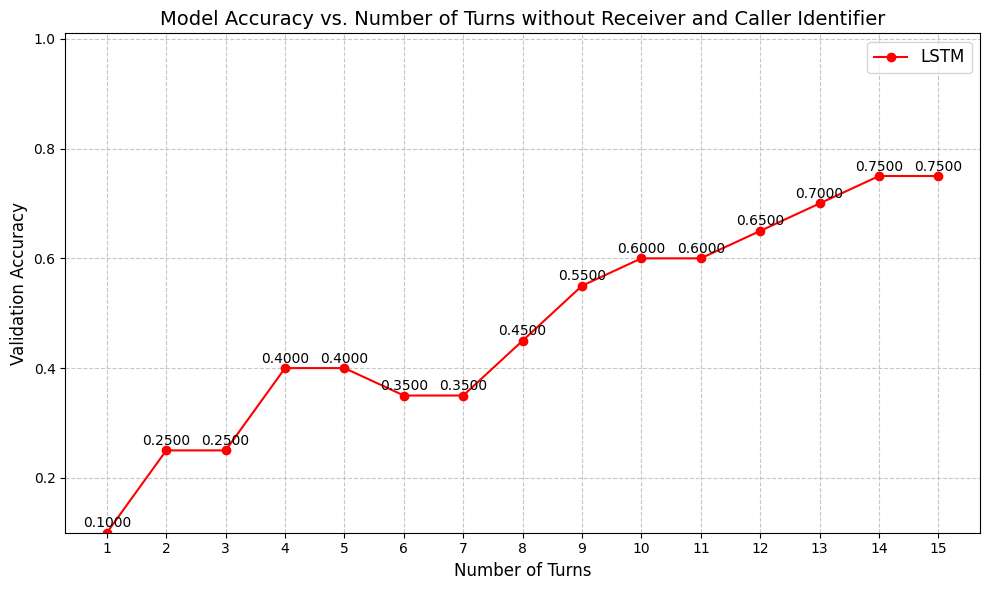

In [20]:
from huggingface_hub import PyTorchModelHubMixin
import torch
import torch.nn as nn
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, DataCollatorWithPadding
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the LSTM model class
class LSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout, model_type="lstm"):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = LSTMClassifier.from_pretrained("BothBosu/lstm-agent-suspect-only-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the LSTM model
LSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    LSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(LSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, LSTM_accuracies, marker='o', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(LSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/188M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.0500
Validation Accuracy (3 turns): 0.0500
Validation Accuracy (4 turns): 0.0500
Validation Accuracy (5 turns): 0.0500
Validation Accuracy (6 turns): 0.0500
Validation Accuracy (7 turns): 0.0500
Validation Accuracy (8 turns): 0.0500
Validation Accuracy (9 turns): 0.0500
Validation Accuracy (10 turns): 0.0500
Validation Accuracy (11 turns): 0.0500
Validation Accuracy (12 turns): 0.0500
Validation Accuracy (13 turns): 0.0500
Validation Accuracy (14 turns): 0.0500
Validation Accuracy (15 turns): 0.0500
Validation Accuracy (16 turns): 0.0500


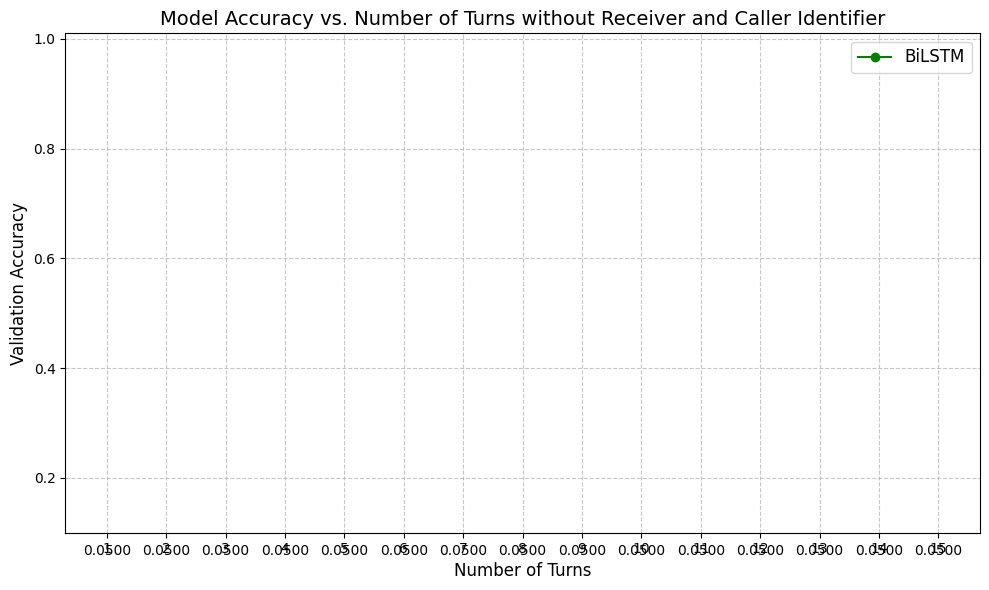

In [21]:
from huggingface_hub import PyTorchModelHubMixin

# Define the LSTM model class
class BiLSTMClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiLSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiLSTM
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.lstm(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiLSTMClassifier.from_pretrained("BothBosu/bilstm-agent-suspect-only-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiLSTM model
BiLSTM_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiLSTM_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(BiLSTM_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiLSTM_accuracies, marker='o', linestyle='-', color='green', label='BiLSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiLSTM_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/122M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.0500
Validation Accuracy (3 turns): 0.0500
Validation Accuracy (4 turns): 0.0500
Validation Accuracy (5 turns): 0.0500
Validation Accuracy (6 turns): 0.0500
Validation Accuracy (7 turns): 0.0500
Validation Accuracy (8 turns): 0.0500
Validation Accuracy (9 turns): 0.0500
Validation Accuracy (10 turns): 0.0500
Validation Accuracy (11 turns): 0.0500
Validation Accuracy (12 turns): 0.0500
Validation Accuracy (13 turns): 0.0500
Validation Accuracy (14 turns): 0.0500
Validation Accuracy (15 turns): 0.0500
Validation Accuracy (16 turns): 0.0500


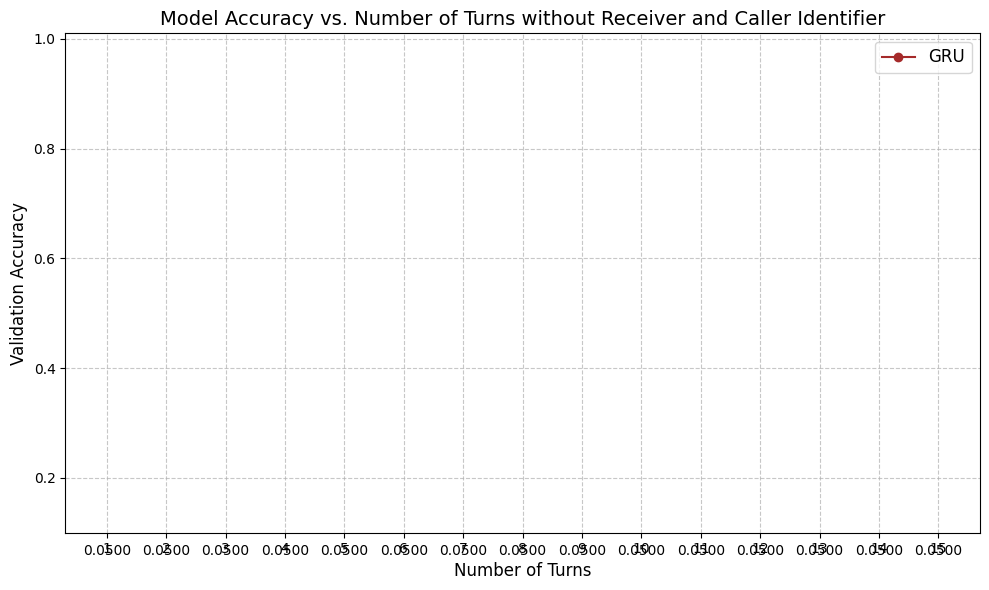

In [22]:
from huggingface_hub import PyTorchModelHubMixin

# Define the GRU model class
class GRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(GRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = GRUClassifier.from_pretrained("BothBosu/gru-agent-suspect-only-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the GRU model
GRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    GRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(GRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, GRU_accuracies, marker='o', linestyle='-', color='brown', label='GRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)  # Set the y-axis limits starting from 0.1
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(GRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/104 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/165M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.4500
Validation Accuracy (3 turns): 0.4000
Validation Accuracy (4 turns): 0.4000
Validation Accuracy (5 turns): 0.4000
Validation Accuracy (6 turns): 0.4000
Validation Accuracy (7 turns): 0.4000
Validation Accuracy (8 turns): 0.4000
Validation Accuracy (9 turns): 0.4000
Validation Accuracy (10 turns): 0.4000
Validation Accuracy (11 turns): 0.4000
Validation Accuracy (12 turns): 0.4000
Validation Accuracy (13 turns): 0.4000
Validation Accuracy (14 turns): 0.4000
Validation Accuracy (15 turns): 0.4000
Validation Accuracy (16 turns): 0.4000


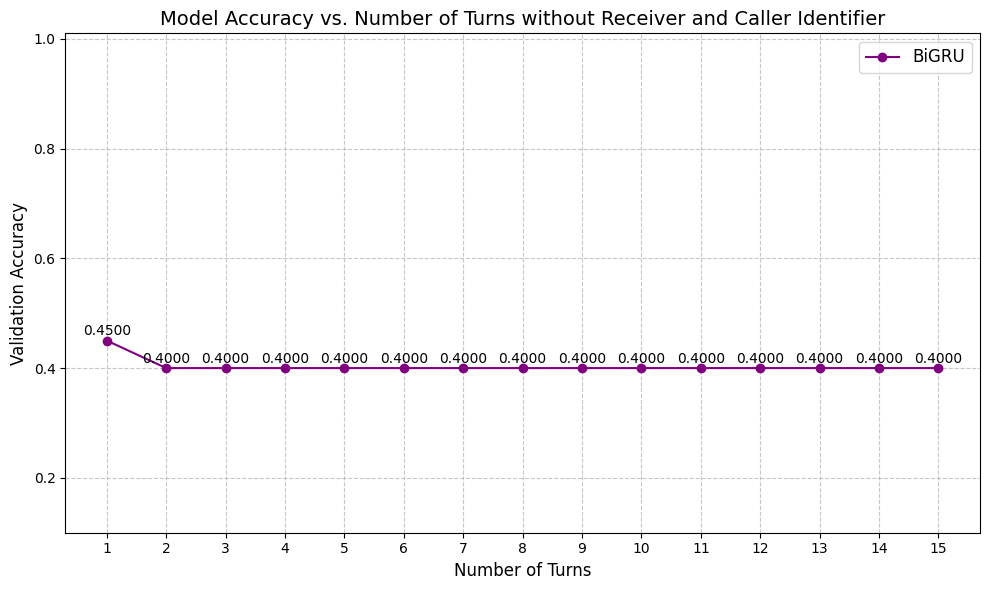

In [23]:
from huggingface_hub import PyTorchModelHubMixin

# Define the BiGRU model class
class BiGRUClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(BiGRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True, bidirectional=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size * 2, num_classes)  # Multiply hidden_size by 2 for BiGRU
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.gru(embedded)
        output = self.dropout(output[:, -1, :])
        output = self.fc(output)
        return output

model = BiGRUClassifier.from_pretrained("BothBosu/bigru-agent-suspect-only-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import matplotlib.pyplot as plt

# Create a list to store the accuracies for the BiGRU model
BiGRU_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    BiGRU_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(BiGRU_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, BiGRU_accuracies, marker='o', linestyle='-', color='purple', label='BiGRU')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(BiGRU_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

config.json:   0%|          | 0.00/154 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

Validation Accuracy (2 turns): 0.2000
Validation Accuracy (3 turns): 0.2000
Validation Accuracy (4 turns): 0.2500
Validation Accuracy (5 turns): 0.3000
Validation Accuracy (6 turns): 0.3500
Validation Accuracy (7 turns): 0.4000
Validation Accuracy (8 turns): 0.4000
Validation Accuracy (9 turns): 0.4000
Validation Accuracy (10 turns): 0.4000
Validation Accuracy (11 turns): 0.4000
Validation Accuracy (12 turns): 0.4000
Validation Accuracy (13 turns): 0.4000
Validation Accuracy (14 turns): 0.3500
Validation Accuracy (15 turns): 0.3000
Validation Accuracy (16 turns): 0.4000


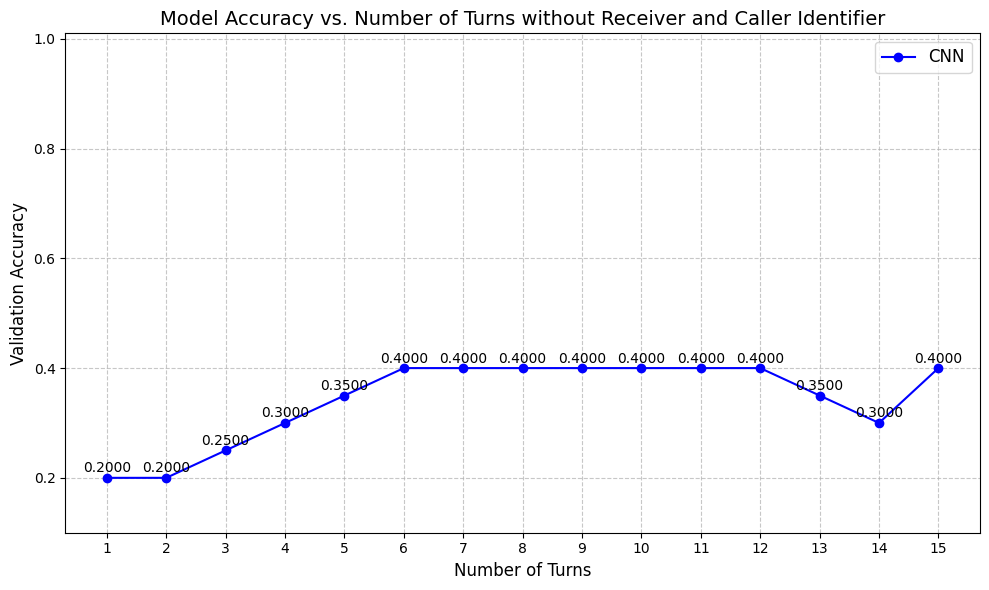

In [24]:
from huggingface_hub import PyTorchModelHubMixin
import torch.nn.functional as F

# Define the CNN model class
class CNNClassifier(nn.Module, PyTorchModelHubMixin):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, num_classes, dropout):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim, out_channels=num_filters, kernel_size=fs) for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, num_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.permute(0, 2, 1)
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        output = self.fc(cat)
        return output


model = CNNClassifier.from_pretrained("BothBosu/cnn-agent-suspect-only-scam-classifier-v1.0")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create a list to store the accuracies
CNN_accuracies = []

for i, val_loader in enumerate(val_loaders, start=2):
    accuracy = evaluate_model(model, val_loader, device)
    print(f"Validation Accuracy ({i} turns): {accuracy:.4f}")
    CNN_accuracies.append(accuracy)

# Plot the model accuracy graph
turns = range(1, 1 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))
plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Accuracy vs. Number of Turns without Receiver and Caller Identifier', fontsize=14)

plt.xticks(turns)
plt.ylim(0.1, 1.01)
plt.grid(True, linestyle='--', alpha=0.7)

for i, acc in enumerate(CNN_accuracies):
    plt.text(turns[i], acc + 0.01, f'{acc:.4f}', fontsize=10, ha='center')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

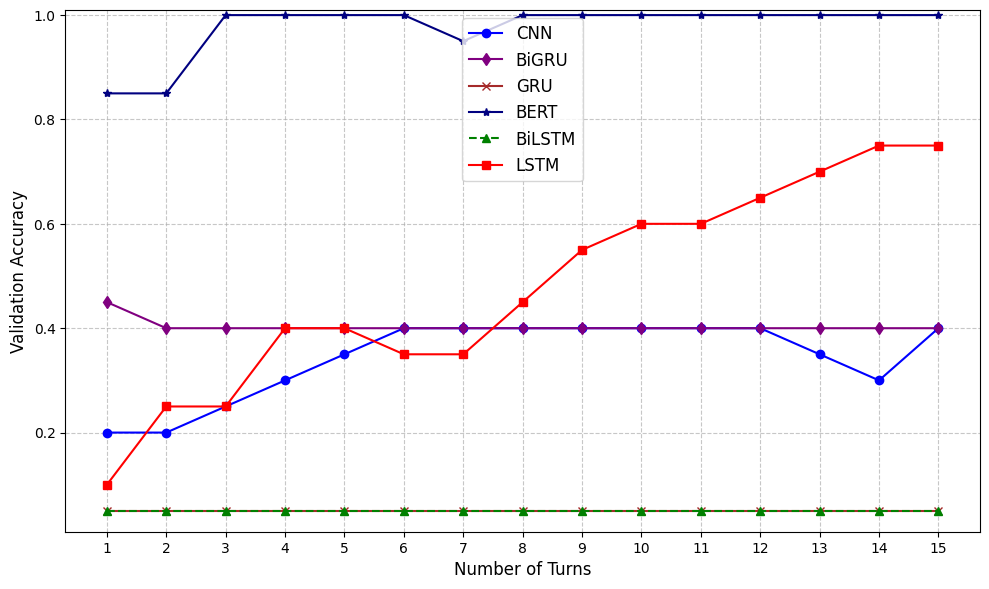

In [26]:
import matplotlib.pyplot as plt

# Plot the model accuracy graph
turns = range(1, 1 + len(CNN_accuracies))

plt.figure(figsize=(10, 6))

plt.plot(turns, CNN_accuracies, marker='o', linestyle='-', color='blue', label='CNN')
plt.plot(turns, BiGRU_accuracies, marker='d', linestyle='-', color='purple', label='BiGRU')
plt.plot(turns, GRU_accuracies, marker='x', linestyle='-', color='brown', label='GRU')
plt.plot(turns, BERT_accuracies, marker='*', linestyle='-', color='navy', label='BERT')
plt.plot(turns, BiLSTM_accuracies, marker='^', linestyle='--', color='green', label='BiLSTM')  # Dashed line for differentiation
plt.plot(turns, LSTM_accuracies, marker='s', linestyle='-', color='red', label='LSTM')

plt.xlabel('Number of Turns', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
# plt.title('Model Accuracy vs. Number of Turns with only Suspect on Youtube Videos (Trained on Multi-Agent Datset)', fontsize=14)

plt.xticks(turns)
plt.ylim(0.01, 1.01)  # Set the y-axis limits starting from 0.5
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()